# Peak Finding

In this notebook, you will learn about finding peaks in the values of an array.

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Peak finding

Write a function, `find_peaks`, that finds and returns the indices of the *local maxima* in a sequence of values in an array. A *local maxima* is defined as a value whose neighboring values are all smaller. Your function should:

* Properly handle local maxima at the endpoints of the input array.
* Return a Numpy array of integer indices.
* Handle any Python iterable as input.

In [2]:
def find_peaks(a):
    """Find the indices of the local maxima in a sequence."""
    peaks = []
    
    for ndx in range(len(a)):
        left_ndx = ndx - 1 if ndx > 0 else None
        right_ndx = ndx + 1 if ndx < len(a) - 1 else None
        
        #we're at the left side of array
        if left_ndx is None and right_ndx is not None and a[ndx] > a[right_ndx]:
            peaks.append(ndx)
        #we're at the right end of array
        elif right_ndx is None and left_ndx is not None and a[ndx] > a[left_ndx]:
            peaks.append(ndx)
        #we're everywhere else in middle of array
        elif left_ndx is not None and right_ndx is not None and a[ndx] > a[left_ndx] and a[ndx] > a[right_ndx]:
            peaks.append(ndx)
    
    return np.array(peaks)
            

In [3]:
p1 = find_peaks([2,0,1,0,2,0,1])
assert np.allclose(p1, np.array([0,2,4,6]))
p2 = find_peaks(np.array([0,1,2,3]))
assert np.allclose(p2, np.array([3]))
p3 = find_peaks([3,2,1,0])
assert np.allclose(p3, np.array([0]))

Here is a string with the first 10000 digits of $\pi$ (after the decimal):

In [4]:
from sympy import pi, N
pi_digits_str = str(N(pi, 10001))[2:]

Write code to perform the following:

* Convert that string to a Numpy array of integers.
* Find the indices of the local maxima in the digits of $\pi$.
* Use `np.diff` to find the distances between consequtive local maxima.
* Visualize that distribution using an appropriately labeled Seaborn `countplot`.

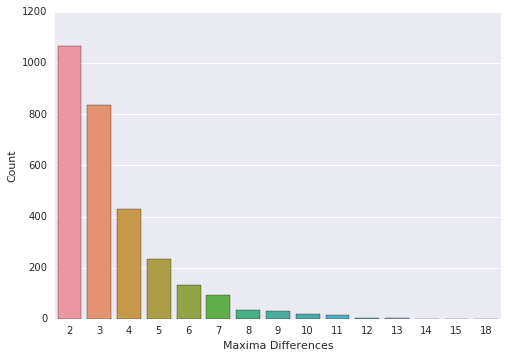

In [5]:
def convert_digits(s):
    digits = []

    for num in pi_digits_str:
        digits.append(num)
    
    return np.array(digits)

peaks = find_peaks(convert_digits(pi_digits_str))
differences = np.diff(peaks)

sns.countplot(differences)
sns.axlabel("Maxima Differences","Count")